# MEASURE OF SPREAD

In [3]:
import pandas as pd

pop = pd.read_csv(r"c:/users/danhaya/arewads/world-population-dynamics/data/processed_data/processed_data.csv")


In [4]:
pop20 = pop.loc[:, ["Country/Territory", "Capital", "Continent", "2020 Population", "Area (km²)", "Density (per km²)"]]
print(pop20.head())

  Country/Territory           Capital Continent  2020 Population  Area (km²)  \
0       Afghanistan             Kabul      Asia         38972230      652230   
1           Albania            Tirana    Europe          2866849       28748   
2           Algeria           Algiers    Africa         43451666     2381741   
3    American Samoa         Pago Pago   Oceania            46189         199   
4           Andorra  Andorra la Vella    Europe            77700         468   

   Density (per km²)  
0            63.0587  
1            98.8702  
2            18.8531  
3           222.4774  
4           170.5641  


In [6]:
gdp = pd.read_csv(r"c:/users/danhaya/arewads/arewads-fellowship/gdp.csv")
gdp20 = gdp.loc[:, ["Country Name", "2020"]]

print(gdp20.head())

                  Country Name          2020
0                        Aruba           NaN
1  Africa Eastern and Southern  9.207923e+11
2                  Afghanistan  2.011614e+10
3   Africa Western and Central  7.845876e+11
4                       Angola  5.837598e+10


In [8]:
pop20= pop20.rename(columns={"Country/Territory": "Country"})
gdp20 = gdp20.rename(columns={"Country Name": "Country",
                              "2020": "GDP 2020"})

In [11]:
pop_gdp20 = pd.merge_ordered(pop20, gdp20, on='Country', how='inner', fill_method='ffill')
print(pop_gdp20.head())

          Country           Capital Continent  2020 Population  Area (km²)  \
0     Afghanistan             Kabul      Asia         38972230      652230   
1         Albania            Tirana    Europe          2866849       28748   
2         Algeria           Algiers    Africa         43451666     2381741   
3  American Samoa         Pago Pago   Oceania            46189         199   
4         Andorra  Andorra la Vella    Europe            77700         468   

   Density (per km²)      GDP 2020  
0            63.0587  2.011614e+10  
1            98.8702  1.488763e+10  
2            18.8531  1.450092e+11  
3           222.4774  7.090000e+08  
4           170.5641           NaN  


In [ ]:
#variance of 2020 population
import numpy as np

print(f"the variance of 2020 population is {np.var(pop_gdp20["2020 Population"]):.2f}")

the variance of 2020 population is 22548999160918916.00


In [22]:
sorted_pop = pop20["2020 Population"].sort_values()


In [ ]:
#let me compare the 0.5 quantile and median

print(f"The median population is {np.median(sorted_pop)}")

print(f"The 0.5 quantile is {np.quantile(sorted_pop, 0.5)}")

The median population is 5493074.5
The 0.5 quantile is 5493074.5


In [27]:
#let me compare standard deviation and mean absolute deviation

pop_std = np.std(pop_gdp20["2020 Population"])
pop_std1 = np.sqrt(np.var(pop_gdp20["2020 Population"]))
print(f"This is the value of standard deviation of the population column {pop_std:.2f}")
#print(pop_std1)

dists = pop_gdp20["2020 Population"] - np.mean(pop_gdp20["2020 Population"])
#mad means mean absolute deviation
pop_mad = np.mean(np.abs(dists))

print(f"The value of mean absolute deviation of 2020 population is {pop_mad:.2f}")


This is the value of standard deviation of the population column 150163241.71
The value of mean absolute deviation of 2020 population is 49797933.43


In [29]:
#quartiles
print(np.quantile(pop_gdp20["2020 Population"], [0, 0.25, 0.5, 0.75, 1]))

#Using linspace
print(np.quantile(pop_gdp20["2020 Population"], np.linspace(0, 1, 5)))

[1.10690000e+04 1.20909600e+06 6.75589500e+06 2.30243590e+07
 1.42492978e+09]
[1.10690000e+04 1.20909600e+06 6.75589500e+06 2.30243590e+07
 1.42492978e+09]


In [30]:
#Interquarrtile range

q1 = np.quantile(pop_gdp20["2020 Population"], 0.25)
q3 = np.quantile(pop_gdp20["2020 Population"], 0.75)

iqr = q3 - q1
print("The interquatile range of 2020 population is " + str(iqr))

The interquatile range of 2020 population is 21815263.0


In [40]:
# Outliers
""" data < q1 - 1.5 * iqr 
    or
    data > q3 + 1.5 * iqr
"""
lower_threshold = np.quantile(pop_gdp20["2020 Population"], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(pop_gdp20["2020 Population"], 0.75) + 1.5 * iqr

outliers = pop_gdp20[(pop_gdp20["2020 Population"] < lower_threshold) | (pop_gdp20["2020 Population"] > upper_threshold)]
print(outliers.loc[:, ["Country", "2020 Population"]].head())

print(f"The number of countries in the outliers is {outliers["Country"].nunique()}")

       Country  2020 Population
14  Bangladesh        167420951
25      Brazil        213196304
37       China       1424929781
56    Ethiopia        117190911
60      France         64480053
The number of countries in the outliers is 21


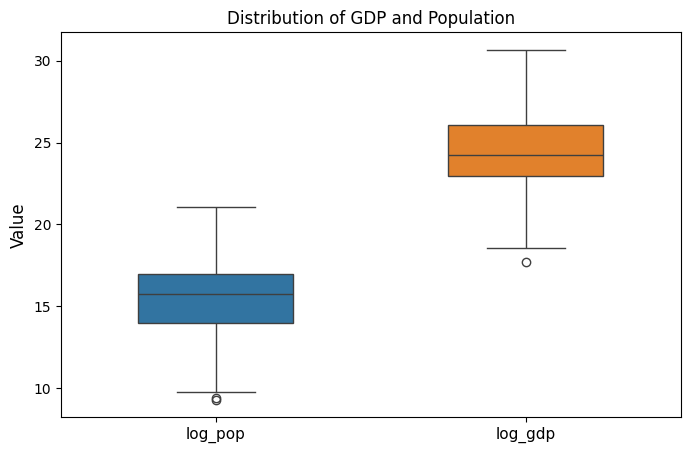

In [43]:
# boxplot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pop_gdp20["log_gdp"] = np.log(pop_gdp20['GDP 2020'])
pop_gdp20['log_pop'] = np.log(pop_gdp20['2020 Population'])

custom_color = ['#1f77b4', '#ff7f0e']

plt.figure(figsize=(8, 5))
sns.boxplot(data=pop_gdp20[["log_pop", "log_gdp"]], palette=custom_color, width=0.5)


#set labels
plt.ylabel("Value", fontsize=12)
plt.xticks(fontsize=11)
plt.title("Distribution of GDP and Population")

#Display
plt.show()

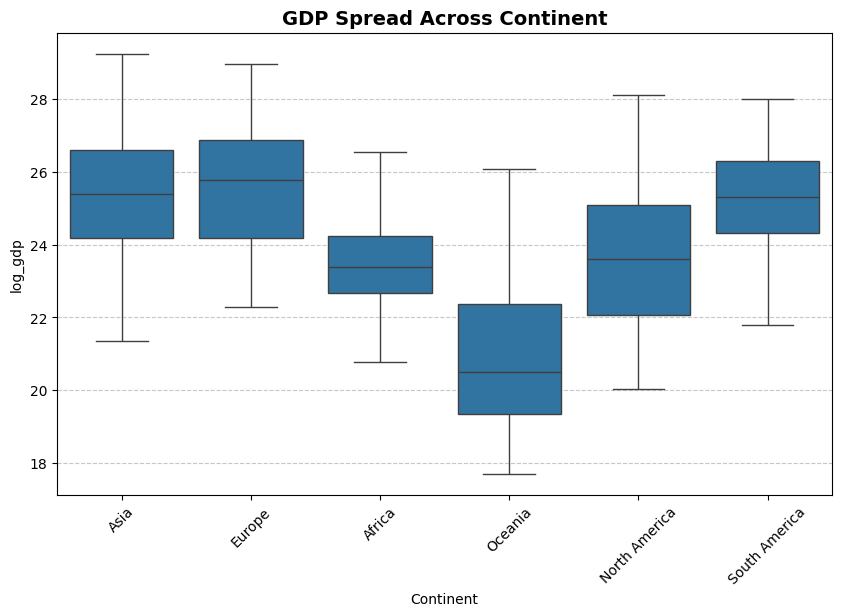

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x=pop_gdp20['Continent'], y=pop_gdp20['log_gdp'], showfliers = False)
plt.title("GDP Spread Across Continent", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#display
plt.show()

AttributeError: module 'matplotlib' has no attribute 'title'

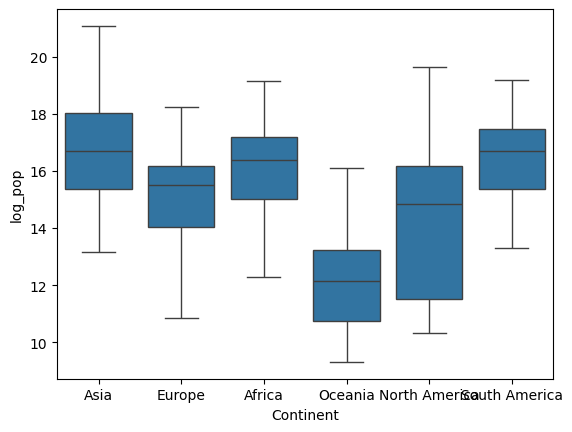

In [51]:
import matplotlib as plt
import seaborn as sns


#plt.figure(figsize=(10, 6))
sns.boxplot(x= pop_gdp20["Continent"], y=pop_gdp20["log_pop"], showfliers=False)
plt.title("Population Spread across Continent", fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle= '--', alpha=0.7)

plt.show()